# SQL-Python Project: Sales Data Analysis

**Author:** Ramadan Salman  
**Date:** 2025-06-02  

---

## Objective

This notebook connects to a MySQL database, extracts sales data from multiple related tables, and performs exploratory data analysis (EDA) using Python.

---

## Data Source

- **Database:** `sales_db` (MySQL)
- **Tables Used:**
  - `orders`
  - `customers`
  - `orderdetails`
  - `products`

---


## Install Required Packages

In [89]:
pip install -r requirements.txt


### Setup Connection

In [92]:
load_dotenv(dotenv_path="key.env")


True

In [94]:
print("DB Host from .env =", os.getenv("DB_HOST"))


DB Host from .env = 127.0.0.1


In [96]:
from db import get_connection
import pandas as pd

conn = get_connection()
cursor = conn.cursor()
cursor.execute("SHOW TABLES;")
cursor.fetchall()


[('customers',), ('orderdetails',), ('orders',), ('products',)]

## Customer Segmentation

#### - Top 10 Customers by Spending

In [100]:
query = """
SELECT c.customer_id, c.first_name, c.last_name, SUM(o.total_amount) AS total_spent
FROM Customers c
JOIN Orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_id
ORDER BY total_spent DESC
LIMIT 10;
"""
top_customers = pd.read_sql(query, conn)
top_customers

C:\Users\User\AppData\Local\Temp\ipykernel_8780\2887578786.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_customers = pd.read_sql(query, conn)


,customer_id,first_name,last_name,total_spent
0,244,Jason,Mcdaniel,74243.95
1,56,Jasmine,Rice,72610.71
2,19,Marcus,Norris,70143.42
3,491,Roger,Wilkins,66891.45
4,347,Christy,Mcmahon,64808.71
5,88,Amy,Taylor,64737.86
6,330,Amber,Middleton,64724.78
7,389,Martin,Williams,63470.36
8,76,Andrew,Williams,63086.13
9,6,Ariel,Marks,63063.46


#### - Spending by Region

C:\Users\User\AppData\Local\Temp\ipykernel_8780\3860754397.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  region_spend = pd.read_sql(query, conn)


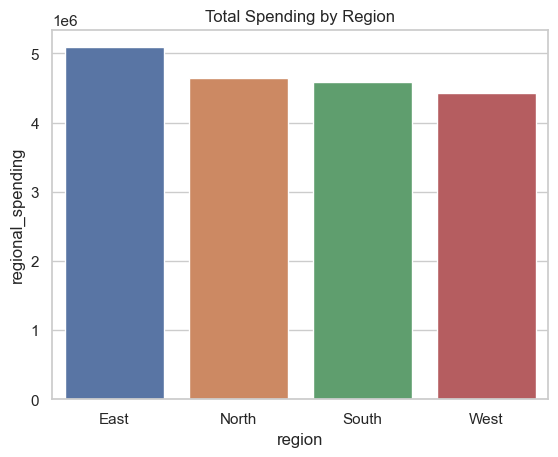

In [103]:
query = """
SELECT region, SUM(o.total_amount) AS regional_spending
FROM Customers c
JOIN Orders o ON c.customer_id = o.customer_id
GROUP BY region
ORDER BY regional_spending DESC;
"""
region_spend = pd.read_sql(query, conn)
sns.barplot(data=region_spend, x='region', y='regional_spending')
plt.title('Total Spending by Region')
plt.show()


## Sales Performance

#### - Monthly Sales (Last 12 Months)

C:\Users\User\AppData\Local\Temp\ipykernel_8780\4024461500.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  monthly_sales = pd.read_sql(query, conn)


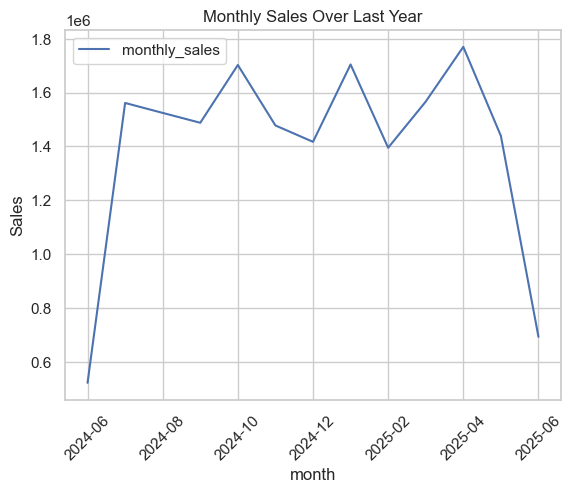

In [107]:
query = """
SELECT DATE_FORMAT(order_date, '%Y-%m') AS month, SUM(total_amount) AS monthly_sales
FROM Orders
WHERE order_date >= CURDATE() - INTERVAL 12 MONTH
GROUP BY month
ORDER BY month;
"""
monthly_sales = pd.read_sql(query, conn)
monthly_sales.plot(kind='line', x='month', y='monthly_sales', title='Monthly Sales Over Last Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


#### - Top 5 Categories by Total Sales


In [110]:
query = """
SELECT p.category, SUM(od.quantity * p.price) AS total_sales, SUM(od.quantity) AS units_sold
FROM OrderDetails od
JOIN Products p ON od.product_id = p.product_id
GROUP BY p.category
ORDER BY total_sales DESC
LIMIT 5;
"""
top_categories = pd.read_sql(query, conn)
top_categories


C:\Users\User\AppData\Local\Temp\ipykernel_8780\875860184.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_categories = pd.read_sql(query, conn)


,category,total_sales,units_sold
0,Electronics,4805932.57,11301.0
1,Books,4603876.71,8567.0
2,Home Goods,3315314.18,8464.0
3,Clothing,3112868.05,6191.0
4,Toys,2941258.67,7150.0


## Order Status Analysis

#### - Order Status Breakdown

In [114]:
query = """
SELECT order_status, COUNT(*) AS count,
       ROUND(100 * COUNT(*) / (SELECT COUNT(*) FROM Orders), 2) AS percentage
FROM Orders
GROUP BY order_status;
"""
status_breakdown = pd.read_sql(query, conn)
status_breakdown


C:\Users\User\AppData\Local\Temp\ipykernel_8780\1425811799.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  status_breakdown = pd.read_sql(query, conn)


,order_status,count,percentage
0,Completed,2541,33.88
1,Pending,2449,32.65
2,Canceled,2510,33.47


#### - Average Order Value by Status

In [117]:
query = """
SELECT order_status, ROUND(AVG(total_amount), 2) AS avg_order_value
FROM Orders
GROUP BY order_status;
"""
avg_order_value = pd.read_sql(query, conn)
avg_order_value


C:\Users\User\AppData\Local\Temp\ipykernel_8780\536416070.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_order_value = pd.read_sql(query, conn)


,order_status,avg_order_value
0,Completed,2584.23
1,Pending,2412.91
2,Canceled,2503.48


## Product Performance

#### - Top 5 Best-Selling Products

In [121]:
query = """
SELECT p.product_id, p.product_name, SUM(od.quantity) AS total_quantity
FROM OrderDetails od
JOIN Products p ON od.product_id = p.product_id
GROUP BY p.product_id
ORDER BY total_quantity DESC
LIMIT 5;
"""
top_products = pd.read_sql(query, conn)
top_products


C:\Users\User\AppData\Local\Temp\ipykernel_8780\375976312.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_products = pd.read_sql(query, conn)


,product_id,product_name,total_quantity
0,81,Off Bring,575.0
1,11,Improve Single,559.0
2,38,Arrive End,524.0
3,34,Box While,514.0
4,23,Matter Here,509.0


#### - Revenue by Product Category

C:\Users\User\AppData\Local\Temp\ipykernel_8780\639410365.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  category_revenue = pd.read_sql(query, conn)


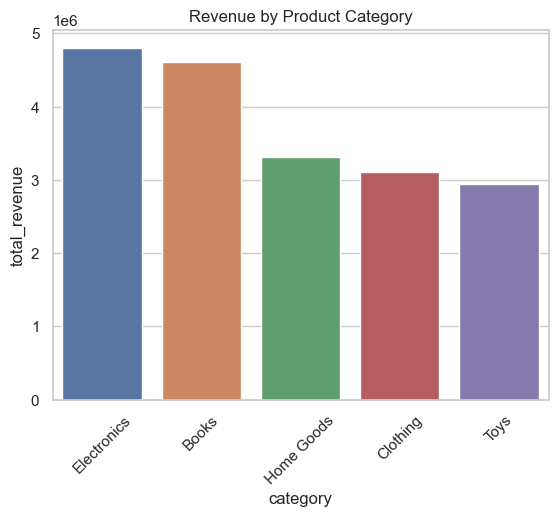

In [124]:
query = """
SELECT p.category, SUM(od.quantity * p.price) AS total_revenue
FROM OrderDetails od
JOIN Products p ON od.product_id = p.product_id
GROUP BY p.category
ORDER BY total_revenue DESC;
"""
category_revenue = pd.read_sql(query, conn)
sns.barplot(data=category_revenue, x='category', y='total_revenue')
plt.title('Revenue by Product Category')
plt.xticks(rotation=45)
plt.show()


## Sales Forecast (Simple)

#### - Monthly Sales Time Series

In [128]:
query = """
WITH RECURSIVE months AS (
    SELECT DATE_FORMAT(DATE_SUB(CURDATE(), INTERVAL 36 MONTH), '%Y-%m-01') AS month
    UNION ALL
    SELECT DATE_ADD(month, INTERVAL 1 MONTH)
    FROM months
    WHERE month < LAST_DAY(CURDATE())
)
SELECT
    DATE_FORMAT(m.month, '%Y-%m') AS month,
    IFNULL(SUM(o.total_amount), 0) AS total_sales
FROM months m
LEFT JOIN Orders o
  ON YEAR(o.order_date) = YEAR(m.month)
 AND MONTH(o.order_date) = MONTH(m.month)
GROUP BY m.month
ORDER BY m.month
LIMIT 36;
"""

C:\Users\User\AppData\Local\Temp\ipykernel_8780\3009568959.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_ts = pd.read_sql(query, conn)


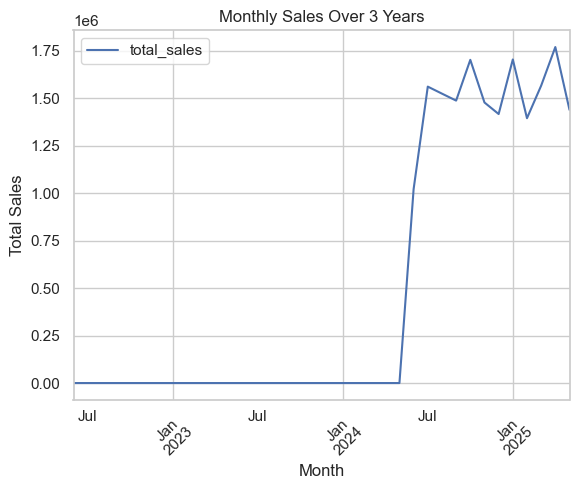

In [130]:
sales_ts = pd.read_sql(query, conn)
sales_ts['month'] = pd.to_datetime(sales_ts['month'])
sales_ts.set_index('month', inplace=True)

sales_ts.plot(title="Monthly Sales Over 3 Years")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()


In [144]:
sales_ts.head(5)


,total_sales
month,
2022-06-01,0.0
2022-07-01,0.0
2022-08-01,0.0
2022-09-01,0.0
2022-10-01,0.0


#### - Forecast with Exponential Smoothing

In [137]:
sales_ts.shape


(36, 1)

In [141]:
non_zero = sales_ts[sales_ts['total_sales'] > 0]
non_zero.head()


,total_sales
month,
2024-06-01,1021393.80
2024-07-01,1561361.77
2024-08-01,1524411.48
2024-09-01,1487752.05
2024-10-01,1702416.13


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


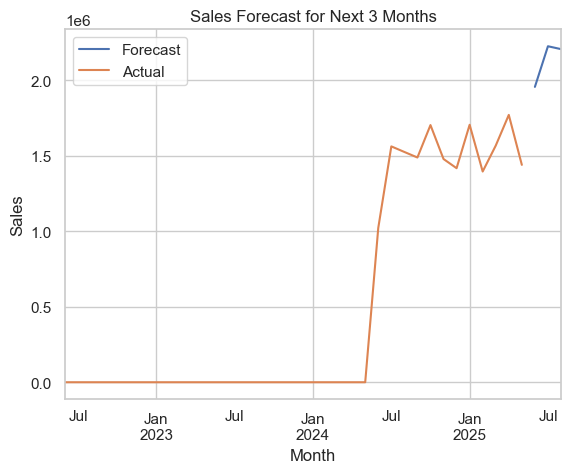

In [161]:
from statsmodels.tsa.api import ExponentialSmoothing

# Build seasonal model 
model = ExponentialSmoothing(
    sales_ts['total_sales'],
    trend='add',
    seasonal='add',
    seasonal_periods=12  
)

fit = model.fit()
forecast = fit.forecast(3)

# Plot forecast
forecast.plot(label='Forecast', legend=True)
sales_ts['total_sales'].plot(label='Actual', legend=True, title="Sales Forecast for Next 3 Months")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.show()


In [151]:
print   ('hi')

2025-06-01    1.955238e+06
2025-07-01    2.224207e+06
2025-08-01    2.205213e+06
Freq: MS, dtype: float64

In [155]:
sales_ts.to_csv("monthly_sales.csv")
forecast.to_csv("forecast_next_3_months.csv")
